In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("sd.csv")

In [4]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [5]:
df.shape
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [15]:
df=df.dropna()

In [8]:
df.shape


(373, 6)

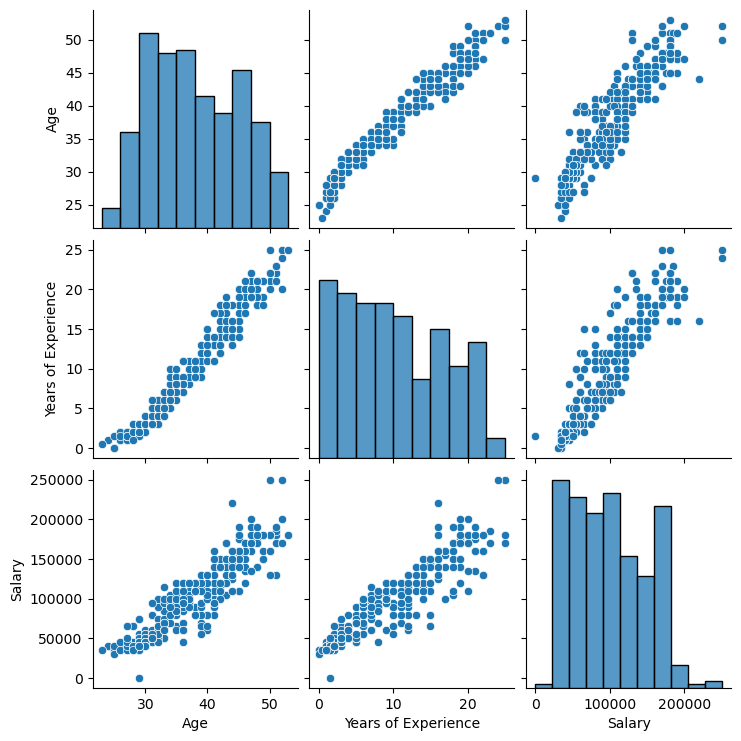

In [16]:
auto=df[['Age','Gender','Education Level','Years of Experience','Salary']]
sns.pairplot(auto)

In [17]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [18]:
gender=pd.get_dummies(auto['Gender'],drop_first=True)
auto=pd.concat([auto,gender],axis=1)

In [19]:
education=pd.get_dummies(auto['Education Level'],drop_first=False)
auto=pd.concat([auto,education],axis=1)

In [20]:
auto=auto.drop(['Gender','Education Level'],axis=1)

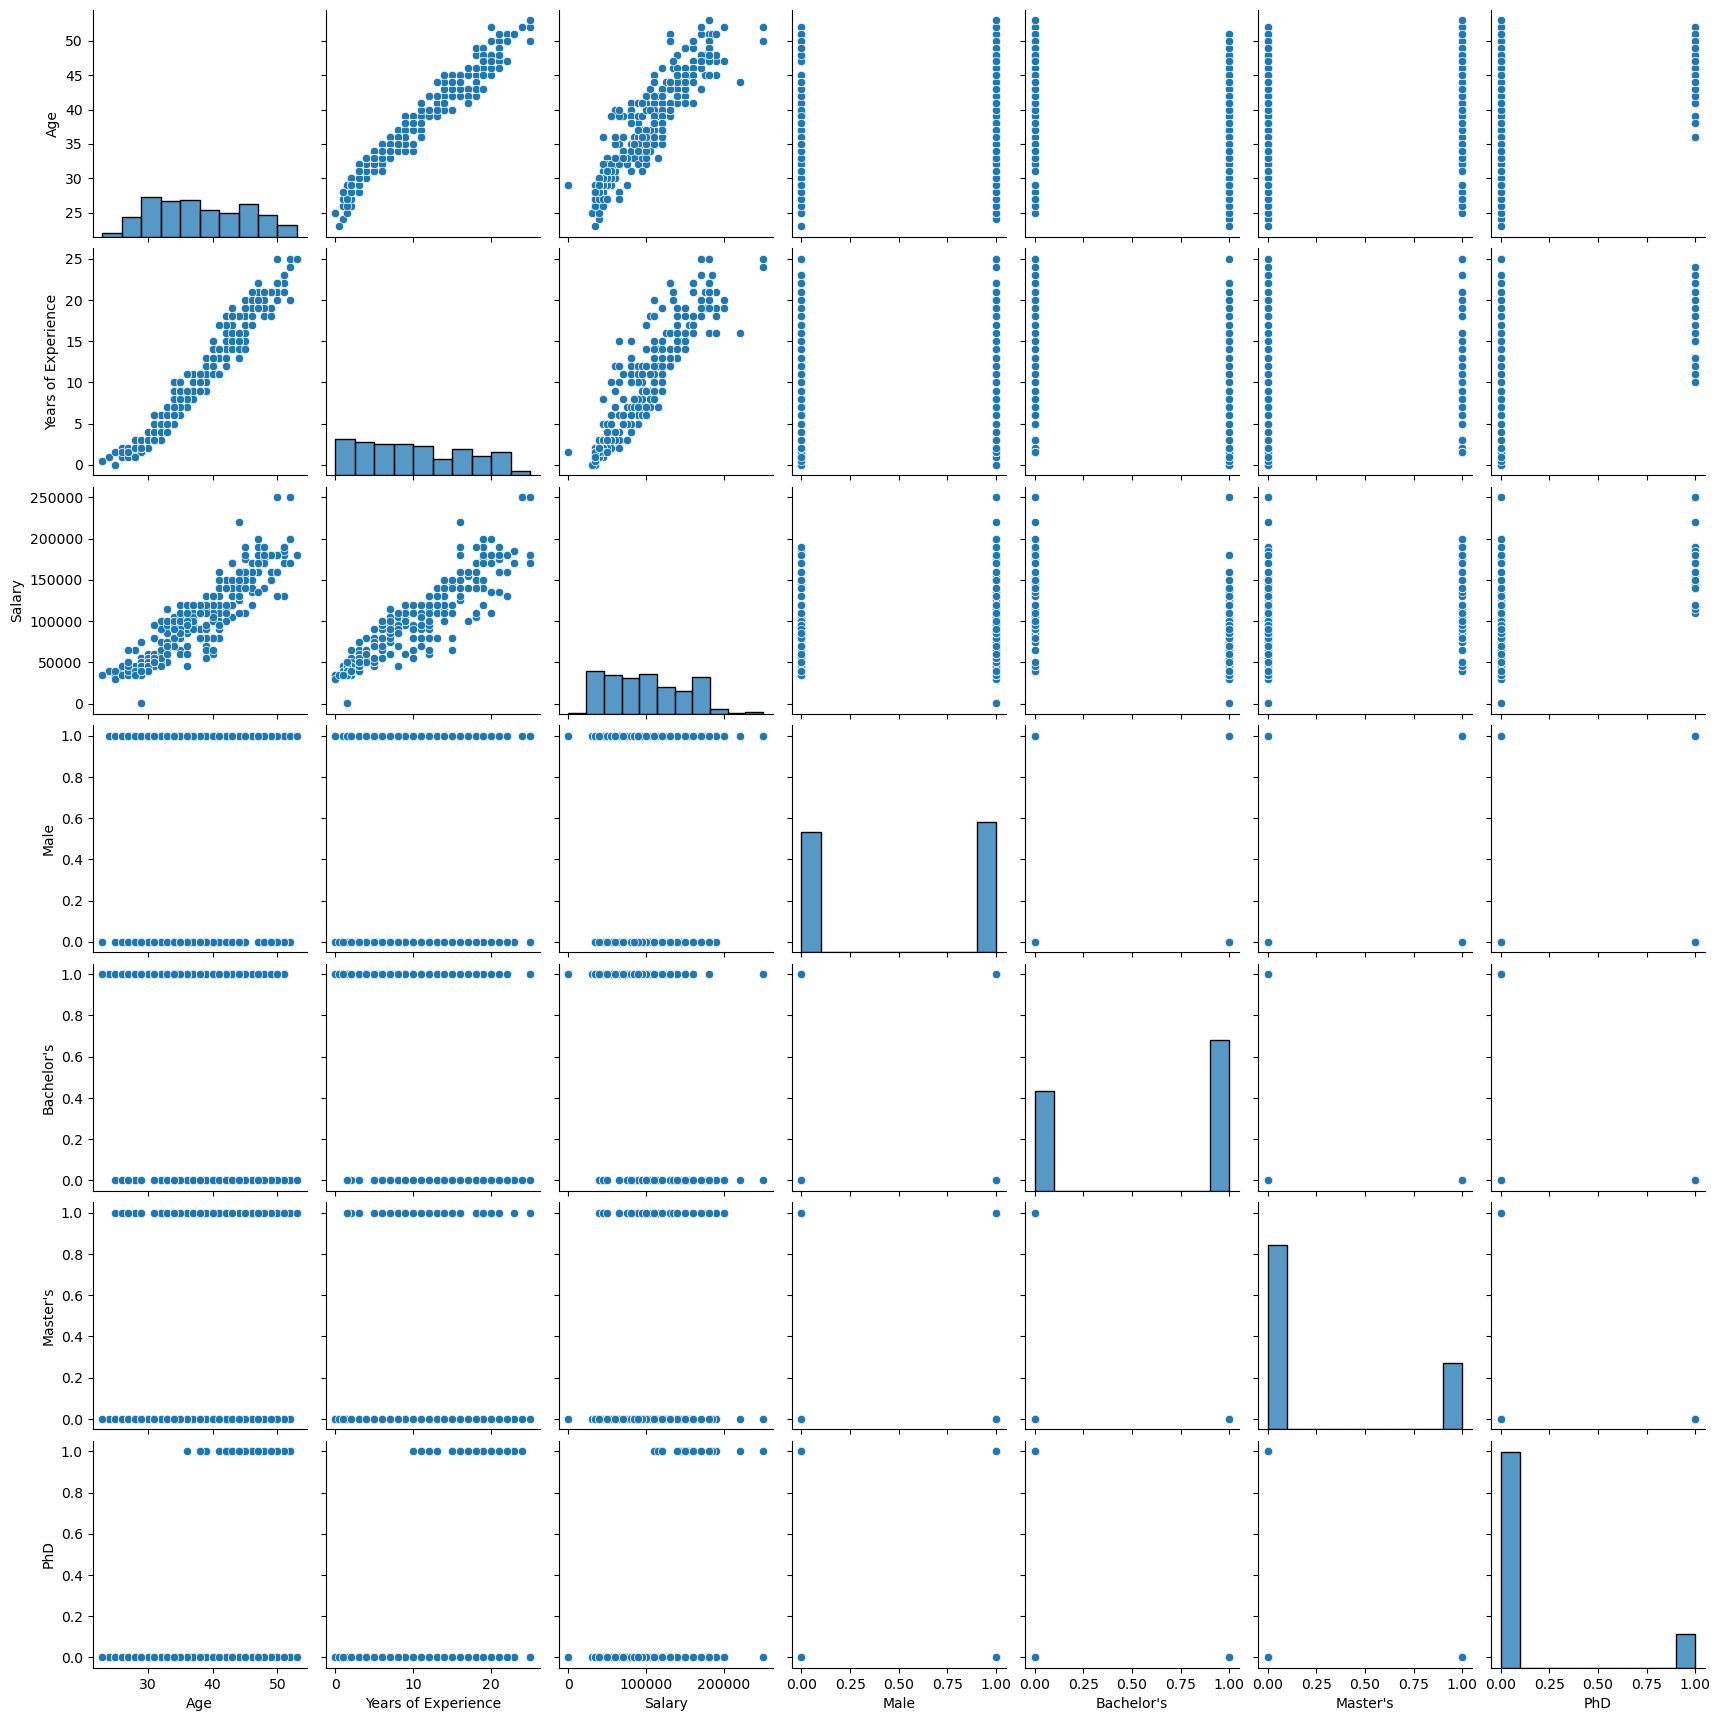

In [21]:
sns.pairplot(auto)

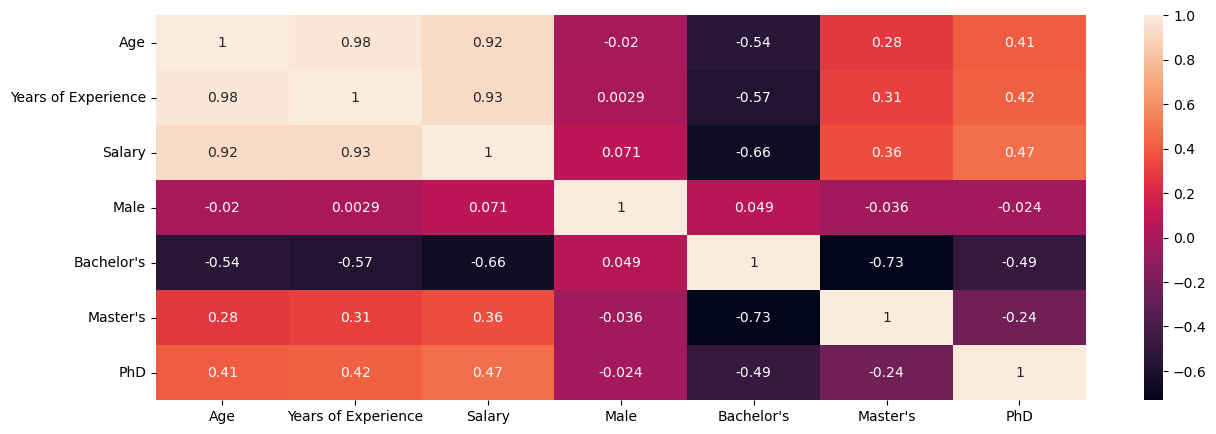

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [22]:
auto


,Age,Years of Experience,Salary,Male,Bachelor's,Master's,PhD
0,32.0,5.0,90000.0,1,1,0,0
1,28.0,3.0,65000.0,0,0,1,0
2,45.0,15.0,150000.0,1,0,0,1
3,36.0,7.0,60000.0,0,1,0,0
4,52.0,20.0,200000.0,1,0,1,0
...,...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,1,0,0
371,43.0,19.0,170000.0,1,0,1,0
372,29.0,2.0,40000.0,0,1,0,0
373,34.0,7.0,90000.0,1,1,0,0


In [23]:
df_train,df_test=train_test_split(auto,train_size=0.4,random_state=40)

In [24]:
X_train=df_train[['Age','Years of Experience','Male',"Bachelor's","Master's","PhD"]]
y_train=df_train['Salary']

In [36]:
len(y_train)

149

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
xpol=poly.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(xpol,y_train)

LinearRegression()

In [40]:
regressor=LinearRegression()
model=regressor.fit(X_train,y_train)

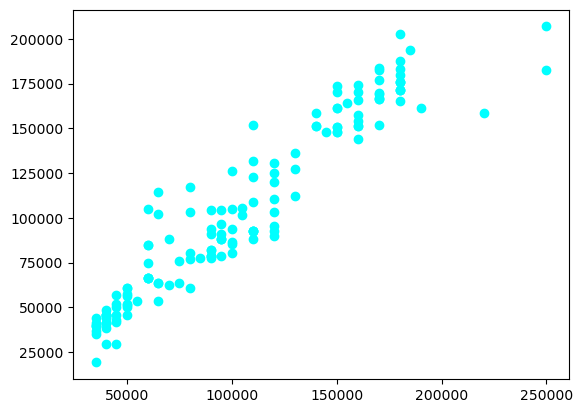

In [41]:

plt.scatter(y_train, regressor.predict(X_train), color='cyan')



In [13]:
data=df_test[14:15]
# data=data.pop("Salary")

In [14]:
act=data.pop("Salary")

In [15]:
cp=model.predict(data)
print("predicted",cp)
print("real",act)

predicted [66545.18181489]
real 268    60000.0
Name: Salary, dtype: float64


In [65]:

plt.scatter(y_train, regressor, color='cyan')

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

,Age,Years of Experience,Male,Bachelor's,Master's,PhD
268,33.0,4.0,1,1,0,0


In [18]:
x_test=df_test.iloc[:,0:]

In [24]:
x_test = df_test.iloc[:, [0, 1, 3, 4, 5, 6]]
y_test=df_test['Salary']

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,regressor.predict(x_test))

0.8948061315221476